<br>

<center><img src="https://keras.io/img/logo.png"></center>


<br>

***
<h4 style="text-align: left">Project:</h4>

<center><h1 style="color: rgb(0, 94, 25);">Keras</h1></center>
<center><h2>Timeseries anomaly detection</h2></center>

***
    
*__<div style="text-align: right"> Author: Denis Sarf </div>__*


### Table of Contents

***
* [1.Project task](#Project_task)
* [2.Introduction](#Introduction)
    * [2.1 Overview of Keras](#Overview)
    * [2.2 Keras Models](#Models)
    * [2.3 Install Keras and Tensorflow](#Installation)
* [3. Project Implementation](#Implementation)
    * [3.1 Project Introduction](#Pr_Introduction)
    * [3.2 Import libraries](#Import)
    * [3.3 Load the data](#data)
    * [3.4 Import libraries](#Import)
* [4. ](#Question_2)
* [References](#References)

## 1.  Project task <a class="anchor" id="Project_task"></a>
***

<div class="alert alert-info"><h5>On the keras website$^{[1]}$, there is an example of time-series anomaly detection$^{[2]}$. Re-create this example in a notebook of your own, explaining the concepts.</h5></div>

## 2.  Introduction <a class="anchor" id="Introduction"></a>
****
### 2.1  Overview of Keras <a class="anchor" id="Overview"></a>

**Keras** is an open-source software library that provides a _Python_ interface for artificial neural networks. **Keras** acts as an interface for the _TensorFlow_ library.  As of version 2.4, only  _TensorFlow_ is supported. Designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible. It was developed as part of the research effort of project ONEIROS (Open-ended Neuro-Electronic Intelligent Robot Operating System) and its primary author and maintainer is [François Chollet](https://en.wikipedia.org/wiki/Fran%C3%A7ois_Chollet), a Google engineer.
**Keras** contains numerous implementations of commonly used neural-network building blocks such as layers, objectives, activation functions, optimizers, and a host of tools to make working with image and text data easier to simplify the coding necessary for writing deep neural network code. 
**Keras** allows users to productize deep models on smartphones (iOS and Android), on the web, or on the Java Virtual Machine.It also allows use of distributed training of deep-learning models on clusters of Graphics processing units (GPU) and tensor processing units (TPU)$^{[3]}$.

**Keras** is$^{[4]}$:
- _Simple_ - but not simplistic. Keras reduces developer cognitive load to free you to focus on the parts of the problem that really matter.
- _Flexible_ - Keras adopts the principle of progressive disclosure of complexity: simple workflows should be quick and easy, while arbitrarily advanced workflows should be possible via a clear path that builds upon what you've already learned.
- _Powerful_ - Keras provides industry-strength performance and scalability: it is used by organizations and companies including _NASA_, _YouTube_, or _Waymo_.

**Benefits**$^{[5]}$.
Keras is highly powerful and dynamic framework and comes up with the following advantages

- Larger community support.

- Easy to test.

- Keras neural networks are written in _Python_ which makes things simpler.

- Keras supports both convolution and recurrent networks.

- Deep learning models are discrete components, so that, you can combine into many ways.

### 2.2  Keras Models <a class="anchor" id="Models"></a>

A **Keras** model is a data structure for how we stack the layers of our neural network. We can stack the layers of our neural network in basically three different ways$^{[6]}$: 
+ [Sequential](https://www.tensorflow.org/guide/keras/sequential_model)
+ [Functional](https://www.tensorflow.org/guide/keras/functional) 
+ [Subclass](https://www.tensorflow.org/guide/keras/custom_layers_and_models)

<center><img src="https://miro.medium.com/max/720/1*WzwKtnA0LEhiCGdWTTpLaA.webp"></center>

**Sequential Model (API)**: It is based on the concept of a sequence of layers, this is the most notorious and elementary part of Keras. It supports designing models layer-by-layer for complex problems with the limitation that _Sequential API_ doesn’t build models that share layers or exhibit multiple inputs and outputs. A sequential model can be created by simply calling *Sequential()*

**Functional API**: It is the most popular method to build Keras models. It can do everything that the *Sequential API* can do. Also, it allows multiple inputs, multiple outputs, branching, and layer sharing. It is a clean and easy-to-use method, and it still allows a good level of customization flexibility. The main idea is that a deep learning model is usually a directed acyclic graph (DAG) of layers. So, the functional API is a way to build layer graphs.

**Subclass model**: Inside Keras, the Model class is the root class used to define a model architecture. Since Keras utilizes object-oriented programming, we can actually subclass the Model class and then insert our architecture definition. Model subclassing is for advanced-level developers who need full control over their model, layer, and training process.
Model subclassing is fully-customizable and enables you to implement your own custom forward pass of the model.
However, this flexibility and customization come at a cost — model subclassing is way harder to utilize than the Sequential API or Functional API and mainly used by researchers.

### 2.3  Install Keras and Tensorflow$^{[7]}$ <a class="anchor" id="Installation"></a>

Instead of `pip` installing each package separately, the recommended approach is to install **Keras** as part of the **TensorFlow** installation. When you install **TensorFlow 2.0+**, **Keras** will be automatically installed as well.

**TensorFlow** can be run on three different processor platforms, the main difference being the speed at which your neural network is trained. Each platform has different hardware requirements and offers different performance:
- CPU – any modern computer can run this version, but it offers the slowest training speeds.
- TPU – only available currently on Google’s Colaboratory (Colab) platform, Tensor Processing Units (TPUs) offer the highest training speeds.
- GPU – most high end computers feature a separate Graphics Processing Unit (GPU) from Nvidia or AMD that offer training speeds much faster than CPUs, but not as fast as TPUs. 

To install **TensorFlow** we can run the following command:

```pip install tensorflow```

##### Update Tensorflow and Keras Using Pip

Installed **TensorFlow** and **Keras**, they can be updated by running the following command:

```pip install -U tensorflow```

We can check your **TensorFlow** installation with the following command:

In [1]:
# Check installed TensorFlow package version.
import tensorflow as tf; print(tf.__version__)

2022-12-13 00:56:04.916072: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-13 00:56:06.329195: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-13 00:56:06.329510: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-13 00:56:25.447368: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

2.11.0


## 3.  Project Implementation <a class="anchor" id="Implementation"></a>
***

### 3.1 Project Introduction <a class="anchor" id="Pr_Introduction"></a>
***
##### Time Series Data
Time Series is a sequence of numerical data collected at different points in time in successive order. This is not cross-sectional data. This is an observation of the value of a variable at different times.

##### Anomaly Detection in Time Series Data
Anomaly Detection in the data mining field is the identification of the data of a variable or events that do not follow a certain pattern. Anomaly detection helps to identify the unexpected behaviour of the data with time so that businesses and companies can make strategies to overcome the situation. It also helps the firms to detect the error that is going to happen at a particular time, or it helps to learn from past histories of data that showed unusual behaviour.
Applying machine learning in anomaly detection helps to increase the speed of execution. The machine learning algorithm’s implementation helps companies to find simple and effective approaches for detecting anomalies. Since machine learning algorithms are able to learn from data and make predictions so applying these algorithms in anomaly detection of time series data carries a huge impact on its performance$^{[8]}$.

### 3.2 Import libraries <a class="anchor" id="Import"></a>

After installing TensorFlow and Keras, we need to import the required libraries

In [2]:
# Importing the Keras library.
import tensorflow.keras as keras

`matplotlib.pyplot` is a collection of command style functions that make matplotlib work like _MATLAB_. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. In `matplotlib.pyplot` various states are preserved across function calls, so that it keeps track of things like the current figure and plotting area, and the plotting functions are directed to the current axes$^{[9]}$.

In [3]:
# Import the matplotlib.
import matplotlib.pyplot as plt

_NumPy_, which stands for _Numerical Python_, is a scientific computing library built on top of the _Python_ programming language.
The most common way to import _NumPy_ into your _Python_ environment is to use the following syntax: `import numpy as np`
The as `np` portion of the code then tells _Python_ to give _NumPy_ the alias of `np`. This allows you to use _NumPy_ functions by simply typing `np.function_name` rather than numpy$^{[10]}$.

In [4]:
# Import the numpy package.
import numpy as np

_pandas_ is an open source data analysis library built on top of the Python programming language. _pandas_ provides fast, flexible, and expressive data structures designed to make working with "relational" or "labeled" data simple and intuitive$^{[11]}$.

The most common way to import pandas into your Python environment is to use the following syntax:```import pandas as pd```

In [5]:
# Import pandas.
import pandas as pd

The main idea of `seaborn` is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

The `set_theme()`, which is the preferred interface.

**This function may be removed in the future$^{[12]}$.**


In [6]:
# Import pandas.
import seaborn as sns
# Set preferred interface.
sns.set()

### 3.3 Load the data <a class="anchor" id="data"></a>

We will use the [Numenta Anomaly Benchmark (NAB)](https://www.kaggle.com/boltzmannbrain/nab) dataset. It provides artificial time series data containing labeled anomalous periods of behavior.
NAB is a novel benchmark for evaluating algorithms for anomaly detection in streaming, online applications. It comprises over 50 labelled real-world and artificial time-series data files plus a novel scoring mechanism designed for real-time applications. The data and code are fully open-source, with extensive documentation, and a scoreboard of anomaly detection algorithms: [github.com/numenta/NAB](https://github.com/numenta/NAB).

In [7]:
# The Root of URLs.
root_url = 'https://raw.githubusercontent.com/numenta/NAB/master/data/'

# Data file without anomaly.
no_anomaly_url = root_url + 'artificialNoAnomaly/art_daily_small_noise.csv'

# Data file with anomaly.
with_anomaly_url = root_url + 'artificialWithAnomaly/art_daily_jumpsup.csv'

###### Non-Anomaly Data <a class="anchor" id="Non-Anomaly"></a>
***
First, we take the non-anomaly data and see what it looks like.

We will use `pd.read_csv`$^{[13]}$ to read a comma-separated values (CSV) file into DataFrame.

The CSV files have 2 columns **timestamp** and **value**.

In [8]:
# Get data from CSV file using 'pd.read_csv'. 
df_small_noise = pd.read_csv(no_anomaly_url, parse_dates=True, index_col="timestamp")

The `DataFrame.head(n=5)` returns the first `n` rows. This is useful for quick testing if your object has the correct data type in it. If the parameter `n` is not set then it returns by default the first **5** rows

In [9]:
# Print first 5 rows.
df_small_noise.head()

,value
timestamp,
2014-04-01 00:00:00,18.324919
2014-04-01 00:05:00,21.970327
2014-04-01 00:10:00,18.624806
2014-04-01 00:15:00,21.953684
2014-04-01 00:20:00,21.909120


<a id="describe"></a>
To check the DataFrame it will be useful to use ``describe()`` method of pandas.
The ``describe()`` method returns a description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains this information for each column: **count** - The number of not-empty values. **mean** - The average (mean) value.

In [10]:
# Check the info of dataframe.
df_small_noise.describe()

,value
count,4032.000000
mean,42.438353
std,28.077122
min,18.000964
25%,19.841390
50%,21.608487
75%,75.450282
max,87.976128


The `shape` returns a tuple with the number of rows, and the number of columns for the data in the DataFrame. The `ndim` which gives the number of dimensions in our data.

In [11]:
# Check rows and columns.
df_small_noise.shape

(4032, 1)

In [12]:
# Check the number of dimensions.
df_small_noise.ndim

2

The `iloc` indexer is used for integer-location-based indexing/selection by position.

In [13]:
# Check the first element from dataframe.
df_small_noise.iloc[0]

value    18.324919
Name: 2014-04-01 00:00:00, dtype: float64

In [14]:
# Take the first element from 'value' column.
df_small_noise.iloc[0]['value']

18.3249185392

In [15]:
# Take the first element from the value element.
df_small_noise.iloc[0].values[0]

18.3249185392

The `plot()` function is used to draw points in a diagram and, the `plot()` draws a line from point to point by default. The function takes parameters for specifying points in the diagram.We are going to create a plot from our data.

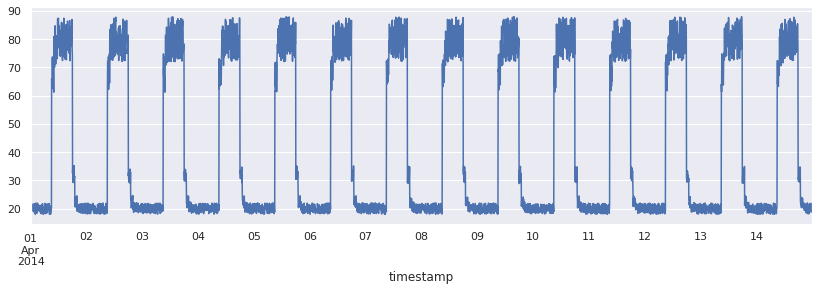

In [16]:
# Create a plot and set the size.
fig, ax = plt.subplots(figsize=(14,4))

# Use pandas to plot data frame.
df_small_noise.plot(legend=False, ax=ax);

###### With-Anomaly Data <a class="anchor" id="With-Anomaly"></a>
***
The next, we take the with-anomaly data and see what it looks like.

In [17]:
# Create 'df_daily_jumpsup' variable and take anomalous data.
df_daily_jumpsup = pd.read_csv(with_anomaly_url, parse_dates=True, index_col="timestamp")

In [18]:
# Print first 7 rows.
df_daily_jumpsup.head(7)

,value
timestamp,
2014-04-01 00:00:00,19.761252
2014-04-01 00:05:00,20.500833
2014-04-01 00:10:00,19.961641
2014-04-01 00:15:00,21.490266
2014-04-01 00:20:00,20.187739
2014-04-01 00:25:00,19.923126
2014-04-01 00:30:00,21.698404


Checking some general information by using the [describe()](#describe) function

In [19]:
# Check the info of dataframe.
df_daily_jumpsup.describe()

,value
count,4032.000000
mean,44.494254
std,32.432473
min,18.001010
25%,19.991382
50%,21.648503
75%,76.435943
max,164.947481


In [20]:
# Check rows and columns.
df_daily_jumpsup.shape

(4032, 1)

In [21]:
# Take the first element from 'value' column.
df_daily_jumpsup.iloc[0]['value']

19.761251903

## References<a class="anchor" id="References"></a>
***
[1] https://keras.io/

[2] https://keras.io/examples/timeseries/timeseries_anomaly_detection/

[3] https://en.wikipedia.org/wiki/Keras

[4] https://keras.io/about/

[5] https://www.tutorialspoint.com/keras/keras_introduction.htm

[6] https://medium.com/@antika.das/keras-models-cnn-functional-vs-sequential-mnist-data-set-d7a19dae9cb7

[7] https://www.activestate.com/resources/quick-reads/how-to-install-keras-and-tensorflow/

[8] https://valueml.com/anomaly-detection-in-time-series-data-using-keras/

[9] https://matplotlib.org/2.0.2/users/pyplot_tutorial.html

[10] https://numpy.org/doc/stable/reference/routines.math.html

[11] https://pandas.pydata.org/docs/user_guide/10min.html

[12] https://seaborn.pydata.org/generated/seaborn.set.html

[13] https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html



<center><h2 style="color: rgb(0, 94, 25);">End</h2></center>